In [3]:
! pip install transformers -q
! pip install timm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 7.5 MB/s eta 0:00:00


In [1]:
from transformers import pipeline

object_detector = pipeline("object-detection", model="facebook/detr-resnet-50")

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In [11]:
from PIL import Image
import matplotlib.pyplot as plt

In [8]:
image = Image.open("/content/test.jpg")

In [9]:
outputs = object_detector(image)

In [10]:
outputs

[{'score': 0.9992408752441406,
  'label': 'person',
  'box': {'xmin': 110, 'ymin': 13, 'xmax': 272, 'ymax': 178}}]

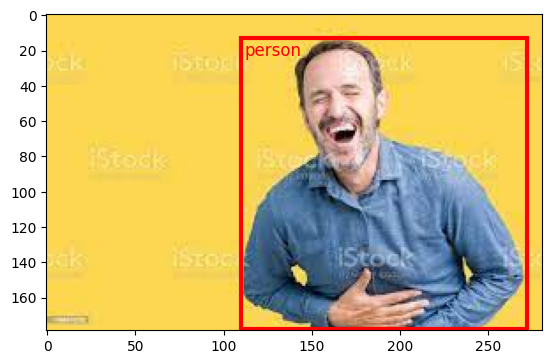

In [23]:
for output in outputs :
  # plt.figure(figsize=(8,5))
  plt.imshow(image)
  ax = plt.gca()

  xmin = output['box']['xmin']
  ymin = output['box']['ymin']
  xmax = output['box']['xmax']
  ymax = output['box']['ymax']

  ax.add_patch(plt.Rectangle(
      (xmin, ymin),
      xmax - xmin,
      ymax - ymin,
      fill = False,
      color = 'red',
      linewidth = 3,
      label = output['label']
  ))

  label_text = output['label']
  ax.text(xmin+2, ymin+2, label_text, color='red', fontsize=12, verticalalignment='top')